# Lab 1: Revenue Management for Trojan Airlines

**Learning Objectives:**

- Simulate customer valuations and arrival times based on forecasts.
- Optimize pricing parameters by brute force search.
- Use simulation modeling to give a business recommendation.


## 1. Background

Trojan airlines is examining its policy in pricing its LAX to SFO departure on Thursday evenings. The selling horizon is the 180 days before depature. Based on studies done by the marketing team, there are two main customer segments who purchase this flight. Below are some summary statistics.

**Leisure customers:**

- Size of segment: mean 200, standard deviation 60
- Time of purchasing: approximately uniformly randomly from 180 days before departure to departure.
- Maximum willingness to pay: mean 200, st. dev. 80.

**Business customers:**

- Size: mean 60, st. dev. 20.
- Time of purchasing: uniformly randomly from 14 days before departure to departure.
- Maximum willingness to pay: mean 350, st. dev. 120.

There are 100 seats on this flight (all economy class) and the fixed cost for operating each flight is about $20,000. You can use the normal distribution to approximate segment size and willingness to pay. For segment size, you can round to the nearest integer, and make it zero if it is negative.

### 1.1 Business Question

You have been hired to conduct a simulation analysis to answer the following question: **What is the optimal revenue that can be obtained from each of the following three pricing policies, and what are the optimal choice of parameters for each policy?**

**A. Constant pricing (current policy):** charge a price of $p$ for the entire selling horizon. (This policy has one parameter, $p$.)

**B. Dynamic Pricing:** charge price $p_1$ initially, but increase the price to $p_2 \ge p_1$ for the last 14 days. (This policy has two parameters, $p_1$ and $p_2$.)

**C. Capacity Rationing:** charge price $p_1$ initially, but increase the price to $p_2 \ge p_1$ when only $l$ tickets are left. (This policy has three parameters, $p_1$, $p_2$, and $l$.)

For each policy, you should assume that the price is always a multiple of 5 dollars.


## 2. Detailed Description of Deliverable

You can work in teams to conduct the analysis during class time, but each individual must submit a working Jupyter notebook on Blackboard before class on 2/28. The Jupyter notebook must contain the following sections. (You should use "# " and "## " in markdown cells to designate the sections, as well as to supply a title to your notebook.)

**1. Executive Summary:** A short text description of your business recommendation to the pricing manager, summarizing the result of your analysis. This section needs to include the following:

- Optimal $p$ for the constant pricing policy and the associated expected profit. 
- Optimal $p_1$ and $p_2$ for the dynamic pricing policy and the associated expected profit.
- Optimal $p_1$, $p_2$ and $l$ for the capacity rationing policy and the associated expected profit.
- A recommendation of which policy to adopt, and an estimated percentage gain in expected profit compared to the current constant price policy.

**2. Generating Customers:** A section containing a code cell that defines a function called "generateCustomers" with no input arguments. This function should return a randomly generated DataFrame with two columns, in the following form:

|` `| arrival_time | valuation |
|--|--|--|
|0 | 179.5 | 210 |
|1 | 170.3 | 230 |
|2 | 169.4 | 280 |
| 3 | 163.4 |150 |
|...|...|...|

Each row corresponds to a customer (either leisure or business). The column "arrival_time" is the number of days before departure this customer arrived, and "valuation" is the customer's maximum willingness to pay. This DataFrame should be sorted in descending order by arrival_time as above (which is in order of arrival because time is counted backwards). The row index should be from 0 up to the total number of customers.

**3. Simulating Pricing Policies:** A section containing a code cell defining each of the following three functions:

```
simulateConstant(customers,seats,p)
```

```
simulateDynamic(custmers,seats,p1,p2)
```

```
simulateRationing(custmers,seats,p1,p2,l)
```

Each function takes as input a DataFrame called "customers" (which is in the format as generated by the "generateCustomers" function), an integer parameter "seats" which is the total number of seats on the flight, as well as the numerical parameters associated with each policy. Each function should return the revenue that the policy would earn under the given customers (not counting the fixed cost), and the specified parameters.

**4. Optimizing Parameters:** A section containing one or more code cells that use the three functions above and simulates at least 100 distinct scenarios of customers and obtain the parameters of each policy that yields the highest expected profit.

The code in this section must contain print statements yielding outputs of the following form.

```
Constant price policy: best p = XXX , best expected profit = XXX
Dynamic price policy: best p1 = XXX , best p2 = XXX , best expected profit = XXX
Capacity rationing policy: best p1 = XXX , best p2 = XXX , best l = XXX , best profit=XXX
```

(Hint: you should generate the 100 scenarios of customers first, before looping through the parameters, and you should use the same random data for the three policies. For example you can first create a list of 100 DataFrames, each of which is generated from the "generateCustomers" function, and then use this list as input when looping through the parameters for each of the policies, in each case averaging the revenue from the 100 cases and subtracting the fixed cost. Moreover, in finding the optimal combination of parameters, you should first use large spacings such as multiples of 50 or 20, to find the region of the optimal parameter, before doing a fine search using multiples of 5 for price and individual numbers for l. To make your code consistent, you should set a seed using `np.random.seed`.)

## 3. Grading Rubric

Unlike the homework submissions, which are graded purely by timely completion, the lab submissions will be graded by correctness. There is a total of 5 points, which is the sum of the following five components. Each component will receive a binary score and your solution must be completely correct to receive the point for that component. (Any mistake within a component would yield a score of 0 for that component.)

**i) Executive summary**: your executive summary clearly presents the desired estimates of optimal parameters and optimal profit, and the result is close to the correct solution. (Due to inherently random nature of simulation, any answer within 5\% will be graded as correct.)

**ii) Correctness of "generateCustomers"**: the grader will add the following code in the code cell defining your "generateCustomers" function and check if the output looks correct. (You should check that after restarting the kernel, running only that code cell with the addition below would work.)

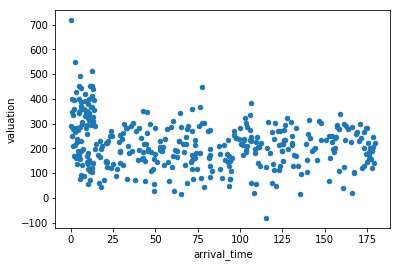

In [9]:
import numpy as np
np.random.seed(0)
generateCustomers().plot(x='arrival_time',y='valuation',kind='scatter')

**iii) Correctness of "simulateConstant"**

**iv) Correctness of "simulateDynamic"**

**v) Correctness of "simulateRationing"**

For the above three components, the grader will run your code cell containing the three functions, and run a test code similar to the following, to check if the output is correct. (You should check that after restarting the kernel, you can run the following code after only running the code cell containing the three functions, but not running anything else.)

```python
import pandas as pd
data=[[170,50],[150,40],[13,95],[12,100]]
customers=pd.DataFrame(data,columns=['arrival_time','valuation'])
print('Constant policy with 2 seats p=50 \t:',simulateConstant(customers,2,50))
print('Constant policy with 2 seats p=100 \t:',simulateConstant(customers,2,100))
print('Dynamic policy with 3 seats p1=40, p2=95 \t:',simulateDynamic(customers,3,40,95))
print('Dynamic policy with 2 seats p1=40, p2=95 \t:',simulateDynamic(customers,2,40,95))
print('Dynamic policy with 1 seats p1=50, p2=100 \t:',simulateDynamic(customers,1,50,100))
print('Rationing policy with 3 seats p1=40, p2=100, l=1 \t:',\
        simulateRationing(customers,3,40,100,1))
print('Rationing policy with 2 seats p1=40, p2=100, l=1 \t:',\
        simulateRationing(customers,2,40,100,1))
print('Rationing policy with 1 seats p1=40, p2=95, l=1 \t:',\
        simulateRationing(customers,1,40,95,1))
```

The correct output in the above case is
```
Constant policy with 2 seats p=50 	: 100
Constant policy with 2 seats p=100 	: 100
Dynamic policy with 3 seats p1=40, p2=95 	: 175
Dynamic policy with 2 seats p1=40, p2=95 	: 80
Dynamic policy with 1 seats p1=50, p2=100 	: 50
Rationing policy with 3 seats p1=40, p2=100, l=1 	: 180
Rationing policy with 2 seats p1=40, p2=100, l=1 	: 140
Rationing policy with 1 seats p1=40, p2=95, l=1 	: 95
```